In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(1123)
beta=np.random.uniform(0,1,2)

In [3]:
def normal(x,theta):#一元的正态分布密度函数
    mu=theta[0]
    s=theta[1]#标准差
    result=(1/(np.sqrt(2*np.pi)*s))*np.exp(-1*(x-mu)**2/(2*s**2))
    return result

In [4]:
def mixnormal(x,theta1,theta2,a):
    mu1=theta1[0]
    s1=theta1[1]#标准差
    mu2=theta2[0]
    s2=theta2[1]#标准差
    result=a*((1/(np.sqrt(2*np.pi)*s1))*np.exp(-1*(x-mu1)**2/(2*s1**2)))+(1-a)*((1/(np.sqrt(2*np.pi)*s2))*np.exp(-1*(x-mu2)**2/(2*s2**2)))
    return result

In [5]:
n=200
np.random.seed(123)
data=np.random.normal(0.5,2,n)

(array([ 1.,  0.,  1.,  1.,  1.,  1.,  3.,  3.,  3.,  6.,  7.,  9., 14.,
        13., 14., 16., 11., 17., 17.,  8., 11.,  9.,  6.,  7.,  9.,  5.,
         1.,  3.,  2.,  1.]),
 array([-5.96211002, -5.57348609, -5.18486216, -4.79623823, -4.4076143 ,
        -4.01899037, -3.63036644, -3.24174251, -2.85311858, -2.46449465,
        -2.07587073, -1.6872468 , -1.29862287, -0.90999894, -0.52137501,
        -0.13275108,  0.25587285,  0.64449678,  1.03312071,  1.42174464,
         1.81036856,  2.19899249,  2.58761642,  2.97624035,  3.36486428,
         3.75348821,  4.14211214,  4.53073607,  4.91936   ,  5.30798393,
         5.69660785]),
 <BarContainer object of 30 artists>)

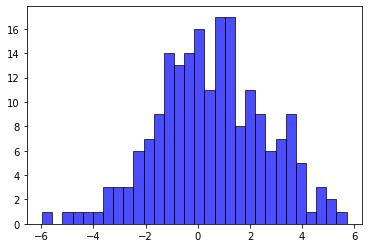

In [6]:
plt.hist(data, bins=30,  facecolor="blue", edgecolor="black", alpha=0.7)

In [7]:
smean=np.mean(data)
sstd=np.std(data)
svar=np.var(data)
stheta0=np.array([smean,sstd])
stheta0

array([0.50757351, 2.10476525])

In [8]:
def ps(x,y,an=0.25):#对方差的惩罚函数
    z=-an*(np.log(x**2/y**2)+(y**2/x**2)-1)
    return z

def pa(α,C=1):#对系数的惩罚函数
    z=C*np.log(1-abs(1-2*α))
    return z

def ln(x,t1,t2,α):#单个样本的混合正态的对数似然
    n=x.shape[0]
    y=np.zeros(n)
    for i in range(n):
        y[i]=np.log(mixnormal(x[i],t1,t2,α))
    return y

def pl(x,t1,t2,α):#混合正态的惩罚联合对数似然
    y=np.sum(ln(x,t1,t2,α))+ps(t1[1],svar)+ps(t2[1],svar)+pa(α)
    return y

def ln0(x,th):#原假设下的惩罚对数似然
    n=x.shape[0]
    y=np.zeros(n)
    for i in range(n):
        y[i]=np.log(normal(x[i],th))
    z=np.sum(y)
    return z

n2=5
m1=5
intmu1 = np.linspace(-1,smean,m1)
intmu2 = np.linspace(smean+0.01,1,m1)
intstd = np.linspace(0.5,1.5,n2)
intparameter1 = np.zeros((m1,n2,2))#储存参数
intparameter2 = np.zeros((m1,n2,2))
for i in range(m1):
    for j in range(n2):
        intparameter1[i,j,0]=intmu1[i]
        intparameter1[i,j,1]=intstd[j]
        intparameter2[i,j,0]=intmu2[i]
        intparameter2[i,j,1]=intstd[j]

ip1 = intparameter1.reshape(1,25,2)[0]
ip2 = intparameter2.reshape(1,25,2)[0]

In [9]:
#分割坐标轴，测试最好的初值
n1=5
n2=5
intmu = np.linspace(-2,2,n1)
intstd = np.linspace(0.5,3,n2)
intparameter = np.zeros((n1,n2,2))
for i in range(n1):
    for j in range(n2):
        intparameter[i,j,0]=intmu[i]
        intparameter[i,j,1]=intstd[j]

ip=intparameter.reshape(1,n1*n2,2)[0]

In [10]:
beta=[0.1,0.3,0.5]
#intresult储存所有初值的测试结果
intresult=np.zeros((n1*n2,n1*n2,3))
for q in range(n1*n2):
    for w in range(n1*n2):
        for e in range (3):
            intresult[q,w,e]=pl(data,ip[q],ip[w],beta[e])


In [11]:
ln0(data,[smean,sstd])

-432.6284950569455

In [12]:
np.max(intresult[:,:,2])

-434.24451880946435

In [13]:
np.array(np.where(intresult==np.max(intresult[:,:,2]))[:2])[0]

array([13, 17], dtype=int64)

In [14]:
#找到三个beta初值下最好的参数位置
ab=np.zeros((3,2))
for i in range(2):
    ab[i]=np.array(np.where(intresult==np.max(intresult[:,:,i]))[:2]).reshape(2)
ab[2]=np.array(np.where(intresult==np.max(intresult[:,:,2]))[:2])[0]

In [15]:
ab

array([[ 2., 17.],
       [ 8., 17.],
       [13., 17.]])

In [16]:
#通过参数位置找到三个beta下对应的参数初值
weight00=[0.1,0.9]
mean00=[ip[int(ab[0,0])][0],ip[int(ab[0,1])][0]]
std00=[ip[int(ab[0,0])][1],ip[int(ab[0,1])][1]]
theta00=np.array([weight00,mean00,std00])

weight01=[0.3,0.7]
mean01=[ip[int(ab[1,0])][0],ip[int(ab[1,1])][0]]
std01=[ip[int(ab[1,0])][1],ip[int(ab[1,1])][1]]
theta01=np.array([weight01,mean01,std01])

weight02=[0.5,0.5]
mean02=[ip[int(ab[2,0])][0],ip[int(ab[2,1])][0]]
std02=[ip[int(ab[2,0])][1],ip[int(ab[2,1])][1]]
theta02=np.array([weight02,mean02,std02])

theta0=np.zeros((3,3,2))
theta0[0]=theta00
theta0[1]=theta01
theta0[2]=theta02

In [17]:
def ModEM(X,theta,C=2,tp=0.25,s=1):#读取sample、order和初值
    num=X.shape[0]
    Ga=np.zeros((num,C))
    c=np.zeros(C)
    d=np.zeros(C)
    thetanext=np.zeros((3,C))
    svar=np.var(X)
    
    for j in range(num):#响应度
        for k in range(C):
            c[k]=theta[0][k]*normal(X[j],theta[1:,k])
        Ga[j]=c/np.sum(c)

    for k in range(C):#更新参数
        d[k]=np.sum(Ga[:,k])
        thetanext[1,k]=np.dot(Ga[:,k],X[:])/d[k]
        thetanext[2,k]=np.sqrt((np.dot(Ga[:,k],(X[:]-theta[1,k])**2)+2*tp*svar)/(d[k]+2*tp))#标准差
        if (d[k]/num) <= 0.5:
            if (d[k]+s)/(num+s) <= 0.5:
                thetanext[0,k]=(d[k]+s)/(num+s)
            else:
                thetanext[0,k]=0.5
        else:
            if ((d[k])/(num+s)) >= 0.5:
                thetanext[0,k]=(d[k]+C)/(num+s)
            else:
                thetanext[0,k]=0.5
    return thetanext

In [18]:
def iterate(X,n,T0,C,tp=0.25):
    for j in range (n):
        T0=ModEM(X,T0,C,tp)
        Mn=2*(pl(X,T0[1:,0],T0[1:,1],T0[0,0])-ln0(X,stheta0))
        print('\n','-'*50,'the',j+1,'th is\n',T0,'\nM(',j+1,',α0=',beta[i],')=',Mn)

In [19]:
theta0

array([[[ 0.1  ,  0.9  ],
        [-2.   ,  1.   ],
        [ 1.75 ,  1.75 ]],

       [[ 0.3  ,  0.7  ],
        [-1.   ,  1.   ],
        [ 2.375,  1.75 ]],

       [[ 0.5  ,  0.5  ],
        [ 0.   ,  1.   ],
        [ 2.375,  1.75 ]]])

In [20]:
tp=n**(1/5)
for i in range(3):
    iterate(data,3,theta0[i],2,tp)


 -------------------------------------------------- the 1 th is
 [[ 0.1226036   0.88734665]
 [-2.16238786  0.86552286]
 [ 1.62175302  1.87629077]] 
M( 1 ,α0= 0.1 )= -7.274147984679985

 -------------------------------------------------- the 2 th is
 [[ 0.12303135  0.8869189 ]
 [-2.09970984  0.85856214]
 [ 1.52562061  1.89172556]] 
M( 2 ,α0= 0.1 )= -7.8828344164874125

 -------------------------------------------------- the 3 th is
 [[ 0.1236409   0.88630935]
 [-2.07655264  0.85748411]
 [ 1.45723469  1.90091112]] 
M( 3 ,α0= 0.1 )= -8.570426335845127

 -------------------------------------------------- the 1 th is
 [[ 0.29359304  0.71635721]
 [-0.74108374  1.01773956]
 [ 2.23998389  1.81612145]] 
M( 1 ,α0= 0.3 )= -4.2163516040021705

 -------------------------------------------------- the 2 th is
 [[ 0.2941556   0.71579465]
 [-0.68702823  0.99699511]
 [ 2.17486828  1.85935053]] 
M( 2 ,α0= 0.3 )= -3.6095746621394937

 -------------------------------------------------- the 3 th is
 [[ 0.2